In [1]:
# Pandas for managing datasets
import pandas as pd

In [2]:
# Matplotlib for additional customization
from matplotlib import pyplot as plt

In [3]:
# Seaborn for plotting and styling
import seaborn as sns

In [4]:
import numpy as np
from scipy import stats

In [5]:
df = sns.load_dataset('titanic')
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


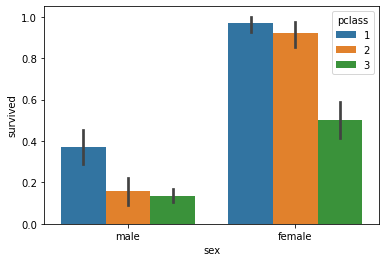

In [7]:
#從各艙等來看，女性的平均存活比例皆遠高於男性。(sns.barplot)
ax = sns.barplot(x="sex", y="survived", hue="pclass", data=df) 

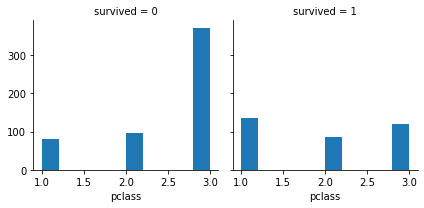

In [8]:
#從存活與否角度來看，綜合考量存活人數及死亡人數，平均存活比例38%，平均死亡比例為62%。(FacetGrid)
g = sns.FacetGrid(df,col="survived")
g.map(plt.hist,"pclass")
plt.show()

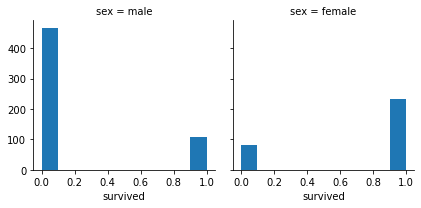

In [9]:
#根據性別角度來看，綜合考量存活人數及死亡人數，女性平均存活比例74%遠高於男性的19%。(FacetGrid)
g = sns.FacetGrid(df,col="sex")
g.map(plt.hist,"survived")
plt.show()

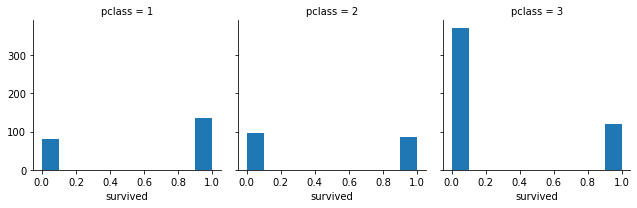

In [10]:
#根據艙等角度來看，綜合考量存活人數及死亡人數，頭等艙的平均存活比例最高為63%，二等艙次之47%，三等艙最低32%。(FacetGrid)
g = sns.FacetGrid(df,col="pclass")
g.map(plt.hist,"survived")
plt.show()

In [11]:
#先檢視各艙位存活人數，此時可以使用groupby函數進行分類，
#其中 survived＝1表示存活，survived＝0表示死亡，將survived加總即為各艙等生存人數。
df.groupby('sex').survived.sum()
#加上性別
survived_counts=df.groupby(['pclass','sex']).survived.sum()
print(survived_counts)

pclass  sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: survived, dtype: int64


In [12]:
#使用pd.crosstab函數繪製交叉表，交叉表可以很直觀的依據艙位等級及性別來查看存活人數及死亡人數。
survived_counts = pd.crosstab([df.pclass,df.sex],df.survived)
survived_counts

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

<AxesSubplot:xlabel='pclass,sex'>

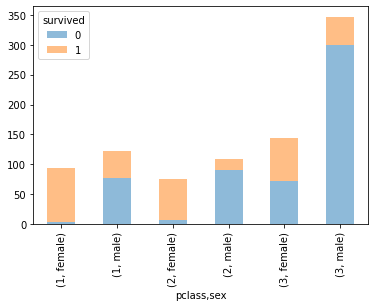

In [13]:
#繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。
survived_counts.plot(kind='bar',stacked=True,alpha=0.5)

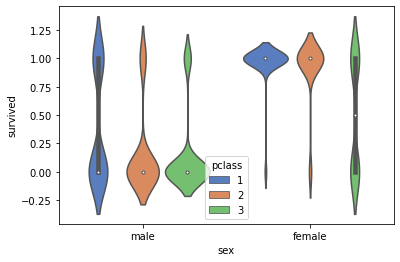

In [14]:
#用小提琴圖顯示各艙等的女性及男性存活狀況
ax = sns.violinplot(x="sex", y="survived", hue="pclass",data=df, palette="muted")

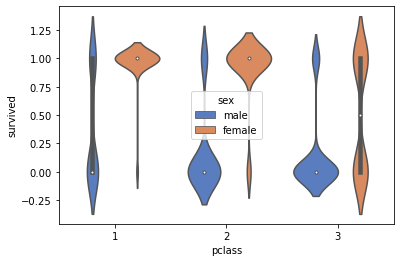

In [15]:
#用小提琴圖顯示各艙等的女性及男性存活狀況
ax = sns.violinplot(x="pclass", y="survived", hue="sex",data=df, palette="muted")

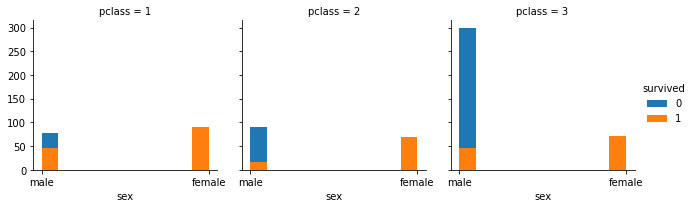

In [16]:
# 瞭解性別在各艙等的分布的存活率
#跟第一次做 Facet.Grid 有何不同：第一次畫的是可視化一個變數的分布，這次是可視化兩個變數的分布。
g = sns.FacetGrid(df,col='pclass',hue='survived')
g.map(plt.hist,"sex")
g.add_legend()
plt.show()

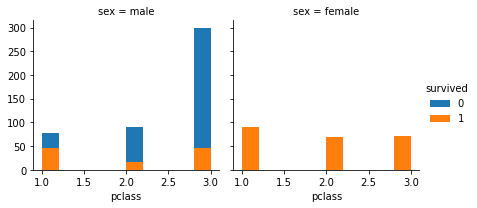

In [17]:
# 瞭解性別在各艙等的分布的存活率
#跟第一次做 Face.Grid 有何不同：第一次畫的是可視化一個變數的分布，這次是可視化兩個變數的分布。
h = sns.FacetGrid(df,col='sex',hue='survived')
h.map(plt.hist,"pclass")
h.add_legend()
plt.show()